In [1]:
#dependences
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
from scipy import stats
from scipy.stats import wilcoxon # test for not normally distribution
from scipy.stats import mannwhitneyu, kruskal  # test for not normally distribution

In [16]:

# Define the path to the CSV file
df_csv = "uk_gov_data_sparse_preproc.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(df_csv, encoding="ISO-8859-1")

# Create a copy of the DataFrame
df_1 = df.copy()

# Display the first 4 rows of the DataFrame
df_1.head(30)

,car_id,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps,co2_emissions_gPERkm
0,1.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,161.0
1,2.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,153.0
2,3.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
3,4.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
4,5.0,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
5,6.0,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
6,7.0,ABARTH,595,595 1.4 TJET 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
7,8.0,ABARTH,595,595 1.4 TJET 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
8,9.0,ABARTH,595,595 Competizione 180 BHP Hatchback,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,171.0
9,10.0,ABARTH,595,595 Competizione 180 BHP Hatchback,SAT5,Automatic,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,172.0


In [3]:
# look at missing value
df_1.isnull().sum()

car_id                    0
manufacturer              0
model                     0
description               0
transmission            147
transmission_type         0
engine_size_cm3           1
fuel                      0
powertrain                0
power_ps                 44
co2_emissions_gPERkm      0
dtype: int64

In [4]:
# look at duplcated value
df_1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6751    False
6752    False
6753    False
6754    False
6755    False
Length: 6756, dtype: bool

In [9]:
##Question 3: Are CO2 emissions different depending on the type of vehicle transmission?

In [26]:
df_clean = df_1[df_1['transmission_type'] != 'Electric - Not Applicable']

C:\Users\Isbelis\AppData\Local\Temp\ipykernel_7160\3030940819.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, loc="best", labels = [f'{l}, {s:0.1f}%' for l, s in zip(data.index, percentages)])


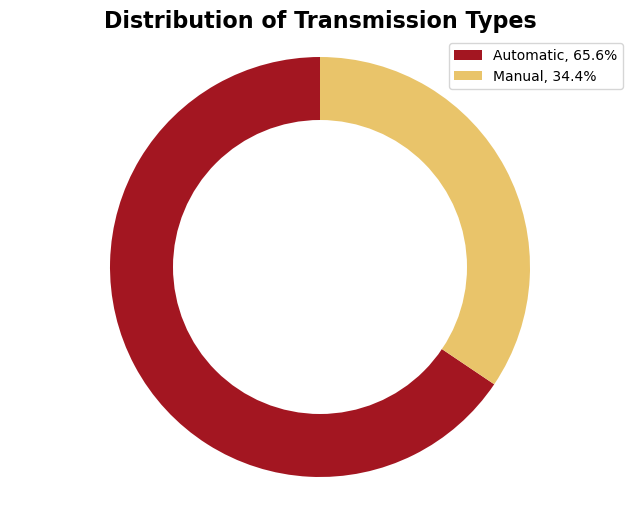

In [27]:
# Step 1: Get the data
data = df_clean.transmission_type.value_counts()
colors = ["#a31621", "#e9c46a", "#5579c6", "#1f7a8c", "#db222a", "#708238", "#a8e4a0"]
# Step 2: Make the canvas
plt.figure(figsize=(8, 6))

# Step 3: Make the plot
patches, texts = plt.pie(data, colors=colors, shadow=False, startangle=90)

# Step 3.5: Add in the donut hole
# draw circle
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# finding percentages
percentages = data.to_numpy() * 100 / data.to_numpy().sum()

# Step 4: Customizations
plt.title("Distribution of Transmission Types", fontweight="bold", fontsize=16)
plt.legend(patches, loc="best", labels = [f'{l}, {s:0.1f}%' for l, s in zip(data.index, percentages)])
plt.axis("equal")

# Step 5: Save/Show
plt.show()

In [28]:
## Descriptive data 
transmission_types = df_clean['transmission_type'].unique()
transmission_types

array(['Manual', 'Automatic'], dtype=object)

In [42]:
for transmission in transmission_types:
    data = df_clean[df_clean['transmission_type'] != transmission]['co2_emissions_gPERkm']
        
        # Test for normality using Shapiro-Wilk test
    stat, p = stats.shapiro(df_1)
    alpha = 0.05
    if p > alpha:
     print(f"CO2 emissions for {transmission} transmission type are normally distributed")
    else:
     print(f"CO2 emissions for {transmission} transmission type are not normally distributed")

CO2 emissions for Manual transmission type are not normally distributed
CO2 emissions for Automatic transmission type are not normally distributed


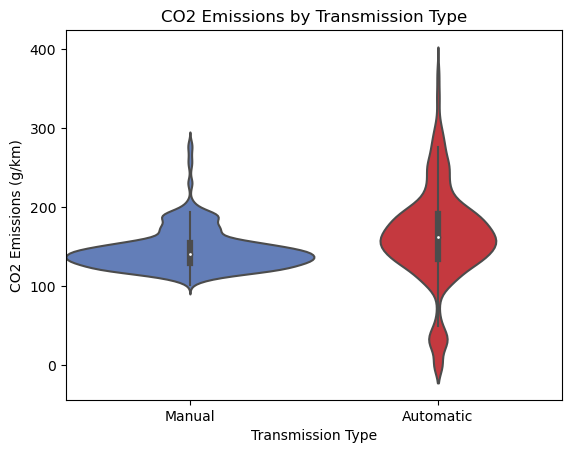

In [43]:
sns.violinplot(x='transmission_type', y='co2_emissions_gPERkm', data=df_clean,width=1, palette=["#5579c6","#db222a"])
plt.title('CO2 Emissions by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

In [33]:
# Separate data by transmission type
manual = df_clean[df_clean['transmission_type'] == 'Manual']['co2_emissions_gPERkm']
automatic = df_clean[df_clean["transmission_type"] == "Automatic"]['co2_emissions_gPERkm']

In [34]:
#Mann-Whitney U test: Suitable for comparing the distributions of two independent groups
u_stat, u_p_value = mannwhitneyu(manual, automatic)
print(f'Mann-Whitney U test: U statistic={u_stat}, p-value={u_p_value}')

Mann-Whitney U test: U statistic=3485012.0, p-value=8.625650157963908e-92
